## Final Project Submission

Please fill out:
* Student name: Jonathan Roman
* Student pace: Self paced 
* Scheduled project review date/time: April 29th, 2022, 9AM
* Instructor name: Claude Fried
* Blog post URL:


# Overview
This project analyzes the relationship between home ownership prices and factors that can influence those prices. Information from the data comes from King County data. Predictive analysis is done to help with possible upgrades to benefit homeowners.

# Business Problem
A real estate firm wants to help their clients (Homeowners) sell their homes at a great price. The analysis can help show correlations between what drives the value of a home and may advise the homeowner to make the necessary upgrades to get better value for their homes.

# Data Understanding

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
#Checking the information, there is a notice of object types in the information which could lead to transforming
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
#checking stats
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preprocessing

In [4]:
#choosing relevant columns
df_new = df.drop(['id', 'date', 'lat', 'long', 'zipcode'], axis=1)
df_new.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503


In [5]:
#checking columns after dropping
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 2.6+ MB


In [6]:
#Checking for missing values 

df_new.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#filling missing values for waterfront, view, yr_renovated with no type replacements
df_new.fillna({'waterfront':'NO', 'view':'NONE', 'yr_renovated': 0.0}, inplace=True)

In [8]:
df_new['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 2.6+ MB


In [10]:
#checking objects
df_objects = df_new[['waterfront', 'view', 'condition', 'grade', 'sqft_basement']]
for col in (df_objects):
    print(df_objects[col].value_counts(),
          "---------------")

NO     21451
YES      146
Name: waterfront, dtype: int64 ---------------
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 ---------------
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64 ---------------
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 ---------------
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2310.0        1
2490.0        1
2196.0        1
792.0         1
1816.0        1
Name: sqft_basement, Length: 304, dtype: int64 ---------------


In [11]:
# converting sqft_basement to float and converting "?" to nan value
df_new['sqft_basement'].replace('?', np.nan, inplace=True)
df_new['sqft_basement'].astype('float64')

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [12]:
#Converting sqft_basement "?" to column for imputing
from sklearn.impute import MissingIndicator

basement = df_new[['sqft_basement']]
missing_indicator = MissingIndicator()
missing_indicator.fit(basement)
basement_result = missing_indicator.transform(basement)

basement_result


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [13]:
df_new['sqft_basement_missing'] = basement_result
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement_missing
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650,False
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639,False
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,2720,8062,False
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000,False
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,1530,1509,False
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,1830,7200,False
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,1020,2007,False
21595,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,0.0,1410,1287,False


In [14]:
#imputing missing values for sqft_basement

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(basement)
basement_imputed = imputer.transform(basement)

basement_imputed

array([[  0.],
       [400.],
       [  0.],
       ...,
       [  0.],
       [  0.],
       [  0.]])

In [15]:
df_new['sqft_basement'] = basement_imputed
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement_missing
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650,False
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639,False
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,2720,8062,False
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000,False
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,1530,1509,False
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,1830,7200,False
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,1020,2007,False
21595,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,0.0,1410,1287,False


In [16]:
df_new.isna().sum()

price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
sqft_living15            0
sqft_lot15               0
sqft_basement_missing    0
dtype: int64

In [17]:
#converting boolean column sqft_basement_missing to binary values
df_new['sqft_basement_missing'] = df_new['sqft_basement_missing'].astype(int)
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement_missing
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,1530,1509,0
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,1830,7200,0
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,1020,2007,0
21595,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,0.0,1410,1287,0


In [18]:
#Dealing with ordinal categories using pandas

df_new['view'] = df_new['view'].astype('category')
df_new['condition'] = df_new['condition'].astype('category')
df_new['grade'] = df_new['grade'].astype('category')

print(df_new['view'])
print(df_new['condition'])
print(df_new['grade'])

0        NONE
1        NONE
2        NONE
3        NONE
4        NONE
         ... 
21592    NONE
21593    NONE
21594    NONE
21595    NONE
21596    NONE
Name: view, Length: 21597, dtype: category
Categories (5, object): ['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']
0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: category
Categories (5, object): ['Average', 'Fair', 'Good', 'Poor', 'Very Good']
0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: category
Categories (11, object): ['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion', ..., '6 Low Averag

In [19]:
#reordering categories

df_new['view'] = df_new['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
df_new['condition'] = df_new['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])
df_new['grade'] = df_new['grade'].cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',  
                                                          '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])

In [20]:
# Assigning numbers to the categories
df_new['view'] = df_new['view'].cat.codes
df_new['condition'] = df_new['condition'].cat.codes
df_new['grade'] = df_new['grade'].cat.codes

df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement_missing
0,221900.0,3,1.00,1180,5650,1.0,NO,0,2,4,1180,0.0,1955,0.0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,NO,0,2,4,2170,400.0,1951,1991.0,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,NO,0,2,3,770,0.0,1933,0.0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,NO,0,4,4,1050,910.0,1965,0.0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,NO,0,2,5,1680,0.0,1987,0.0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,0,2,5,1530,0.0,2009,0.0,1530,1509,0
21593,400000.0,4,2.50,2310,5813,2.0,NO,0,2,5,2310,0.0,2014,0.0,1830,7200,0
21594,402101.0,2,0.75,1020,1350,2.0,NO,0,2,4,1020,0.0,2009,0.0,1020,2007,0
21595,400000.0,3,2.50,1600,2388,2.0,NO,0,2,5,1600,0.0,2004,0.0,1410,1287,0


In [21]:
#Dealing with binary category

from sklearn.preprocessing import OrdinalEncoder

waterfront_binary = df_new[['waterfront']]

encoder_waterfront = OrdinalEncoder()

encoder_waterfront.fit(waterfront_binary)

encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [22]:
waterfront_encoded = encoder_waterfront.transform(waterfront_binary)
waterfront_encoded = waterfront_encoded.flatten()
waterfront_encoded

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
#replacing column

df_new['waterfront'] = waterfront_encoded
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement_missing
0,221900.0,3,1.00,1180,5650,1.0,0.0,0,2,4,1180,0.0,1955,0.0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0,2,4,2170,400.0,1951,1991.0,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0,2,3,770,0.0,1933,0.0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0,4,4,1050,910.0,1965,0.0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0,2,5,1680,0.0,1987,0.0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0,2,5,1530,0.0,2009,0.0,1530,1509,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0,2,5,2310,0.0,2014,0.0,1830,7200,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0,2,4,1020,0.0,2009,0.0,1020,2007,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0,2,5,1600,0.0,2004,0.0,1410,1287,0


In [24]:
df_new['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21597 non-null  float64
 1   bedrooms               21597 non-null  int64  
 2   bathrooms              21597 non-null  float64
 3   sqft_living            21597 non-null  int64  
 4   sqft_lot               21597 non-null  int64  
 5   floors                 21597 non-null  float64
 6   waterfront             21597 non-null  float64
 7   view                   21597 non-null  int8   
 8   condition              21597 non-null  int8   
 9   grade                  21597 non-null  int8   
 10  sqft_above             21597 non-null  int64  
 11  sqft_basement          21597 non-null  float64
 12  yr_built               21597 non-null  int64  
 13  yr_renovated           21597 non-null  float64
 14  sqft_living15          21597 non-null  int64  
 15  sq

In [26]:
df_new.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_basement_missing
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,2.409825,4.657915,1788.596842,291.851724,1970.999676,68.758207,1986.620318,12758.283512,0.021021
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,437.822440,29.375234,364.037499,685.230472,27274.441950,0.143459
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,4.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,2.000000,4.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,3.000000,5.000000,2210.000000,550.000000,1997.000000,0.000000,2360.000000,10083.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,10.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,1.000000


In [27]:
#dealing with extreme outlier in bedrooms and sqft_living
df_new = df_new[df_new['bedrooms'] < 10]
df_new = df_new[df_new['sqft_living'] <= 10000]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21589 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21589 non-null  float64
 1   bedrooms               21589 non-null  int64  
 2   bathrooms              21589 non-null  float64
 3   sqft_living            21589 non-null  int64  
 4   sqft_lot               21589 non-null  int64  
 5   floors                 21589 non-null  float64
 6   waterfront             21589 non-null  float64
 7   view                   21589 non-null  int8   
 8   condition              21589 non-null  int8   
 9   grade                  21589 non-null  int8   
 10  sqft_above             21589 non-null  int64  
 11  sqft_basement          21589 non-null  float64
 12  yr_built               21589 non-null  int64  
 13  yr_renovated           21589 non-null  float64
 14  sqft_living15          21589 non-null  int64  
 15  sq

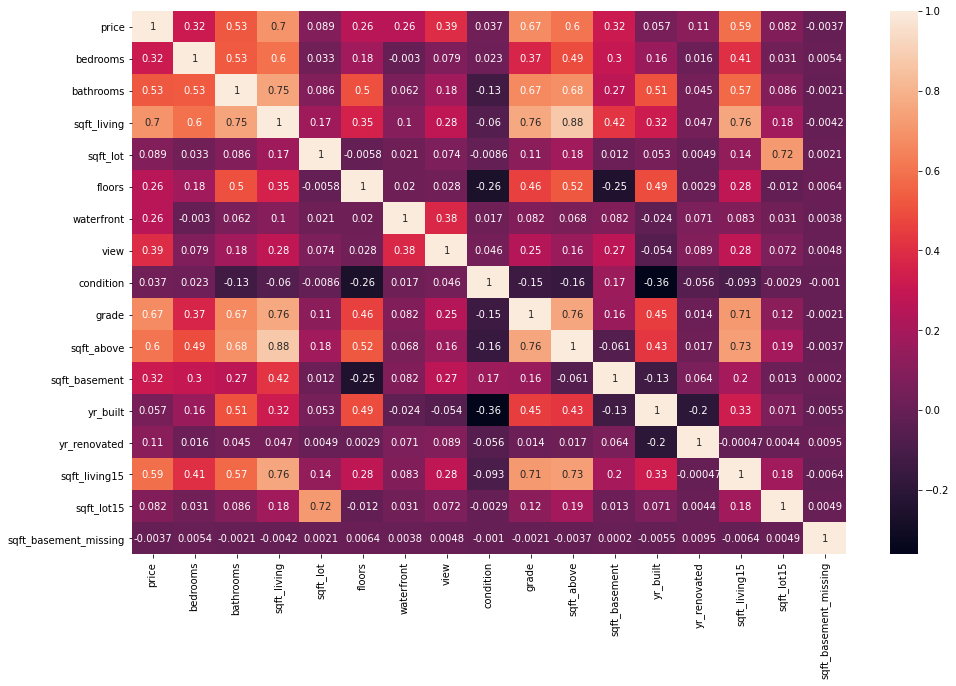

In [28]:
#Checking heatmap for possible correlations to price
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_new.corr(), annot=True);

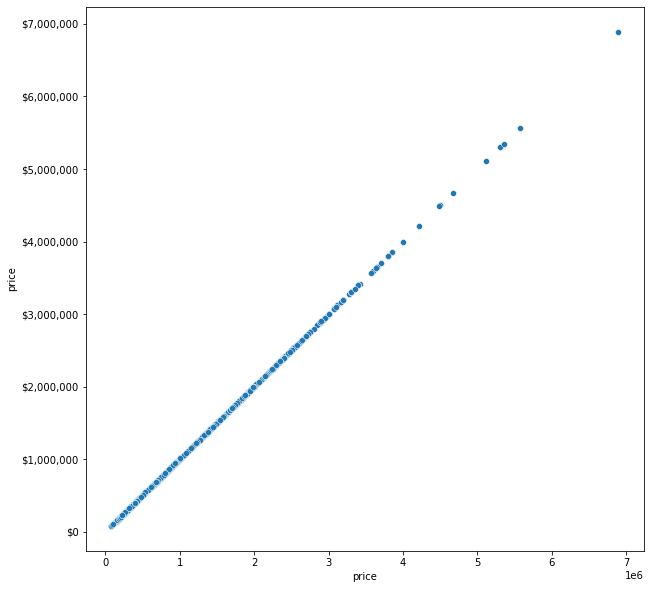

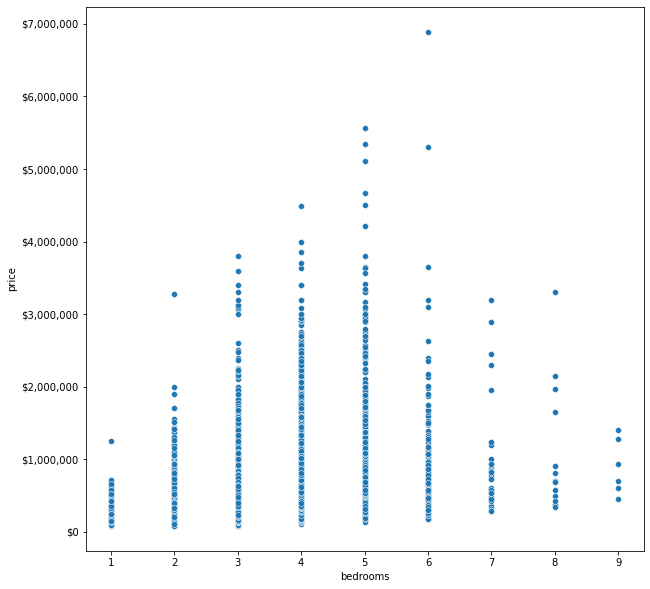

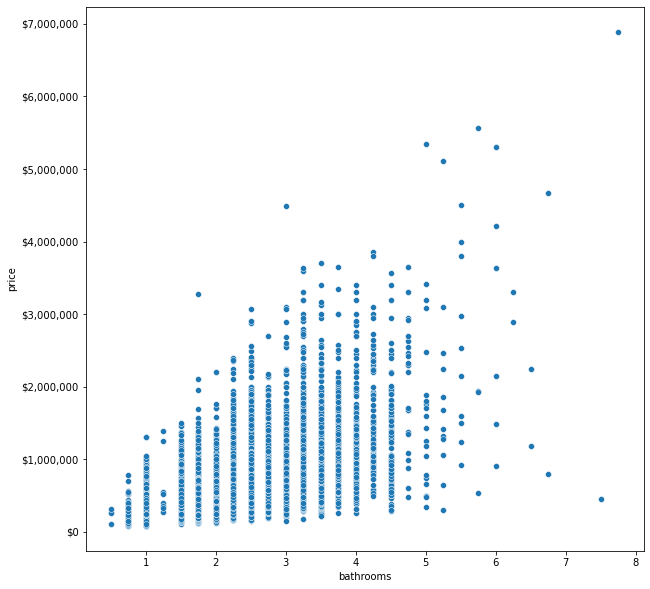

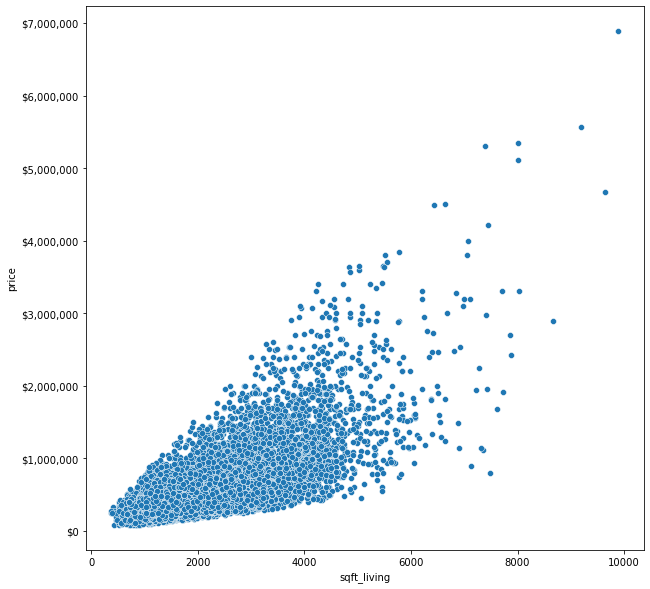

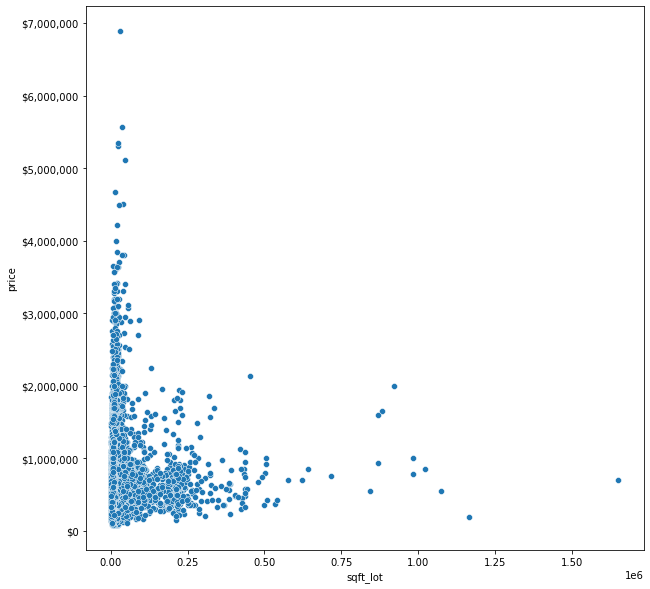

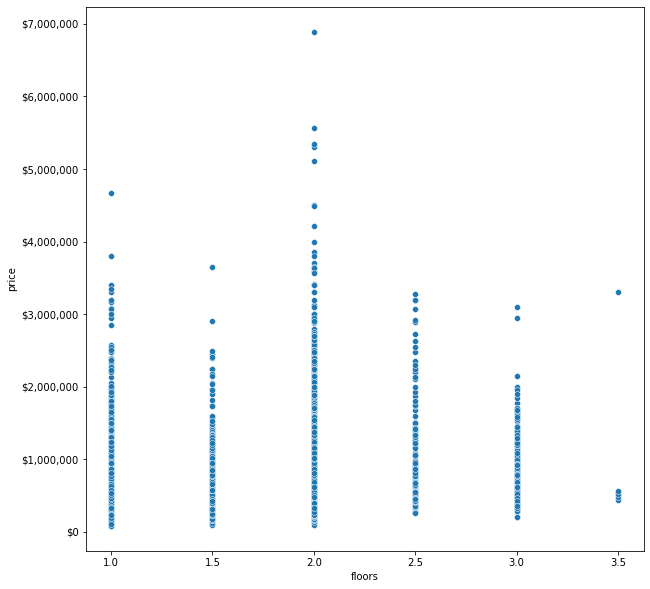

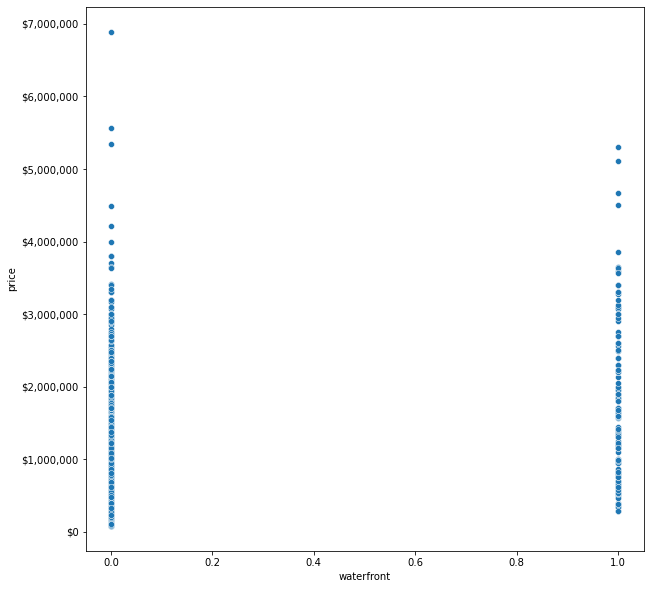

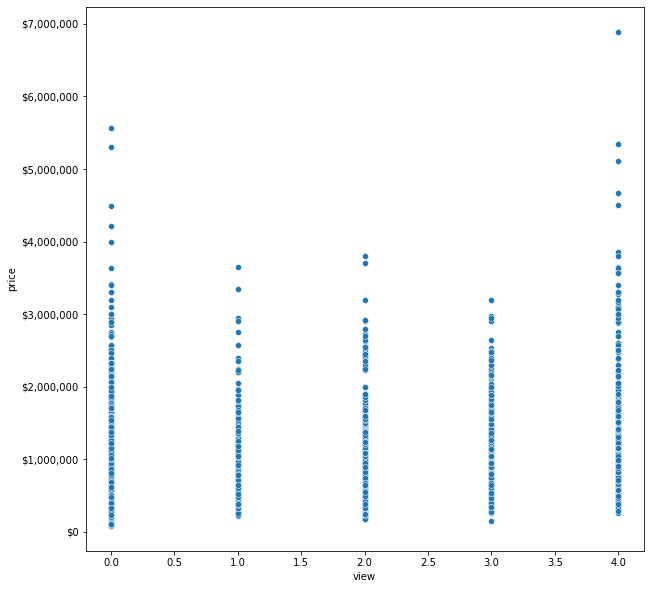

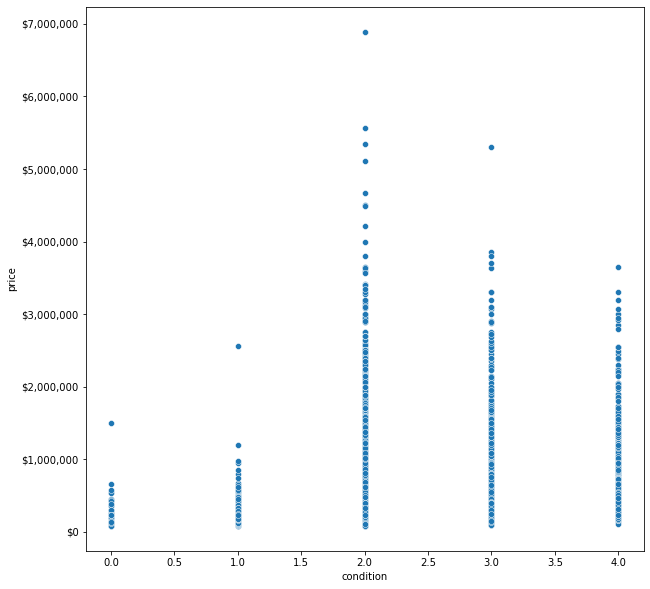

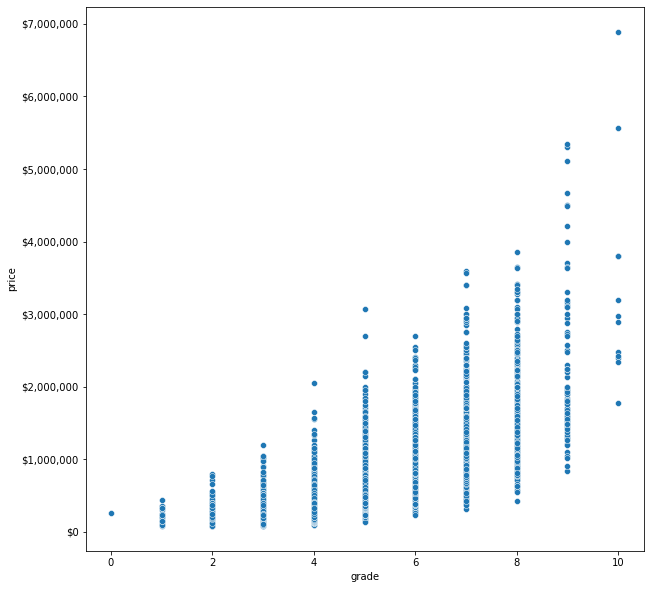

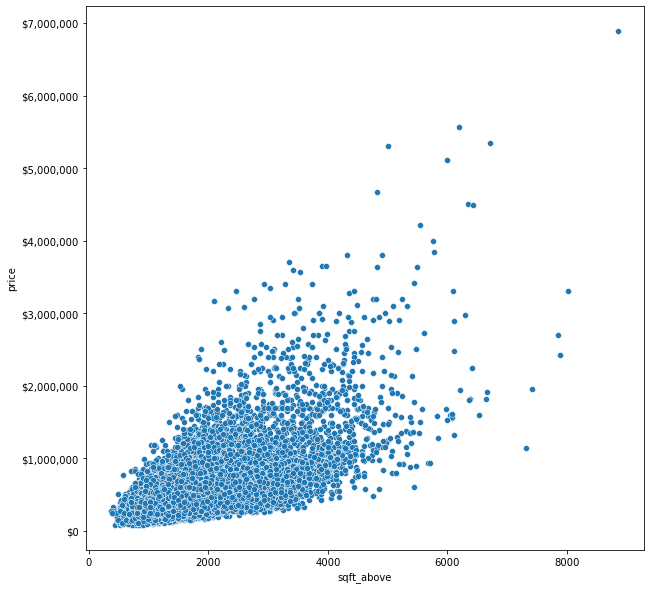

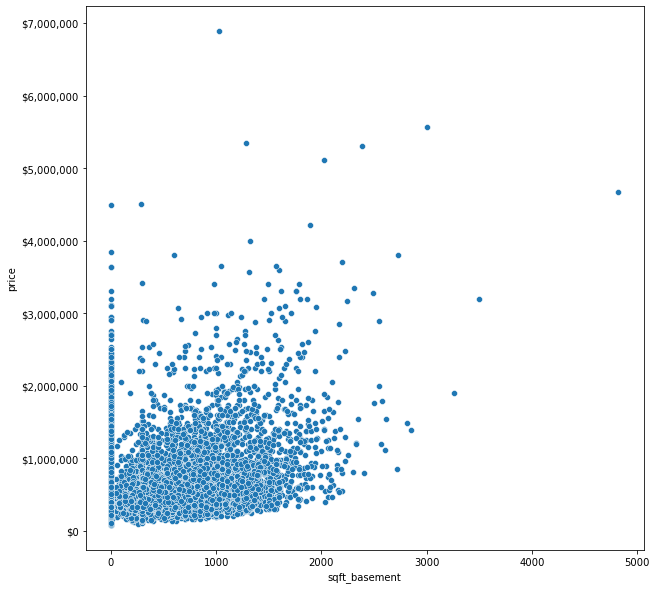

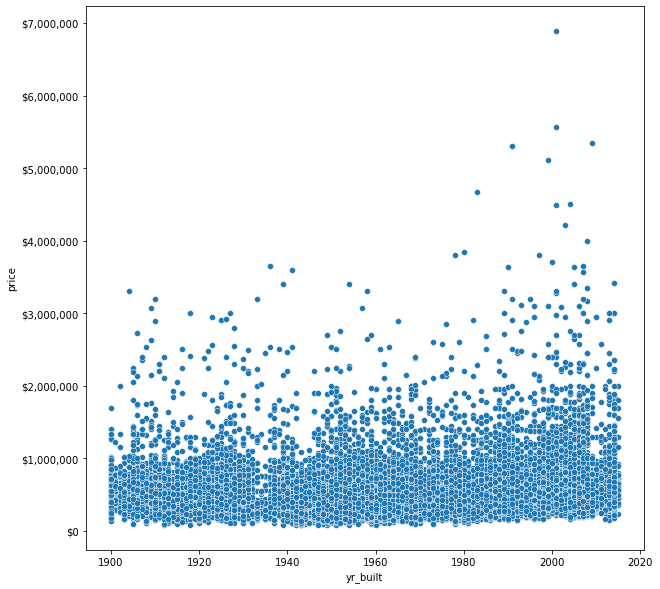

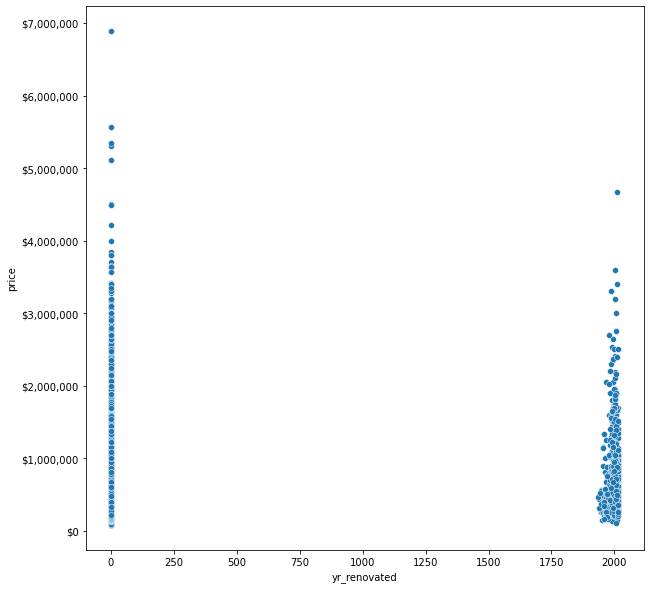

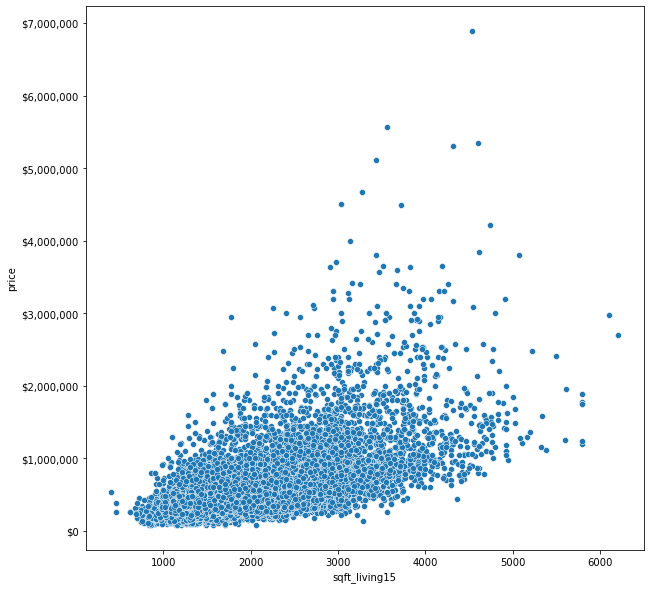

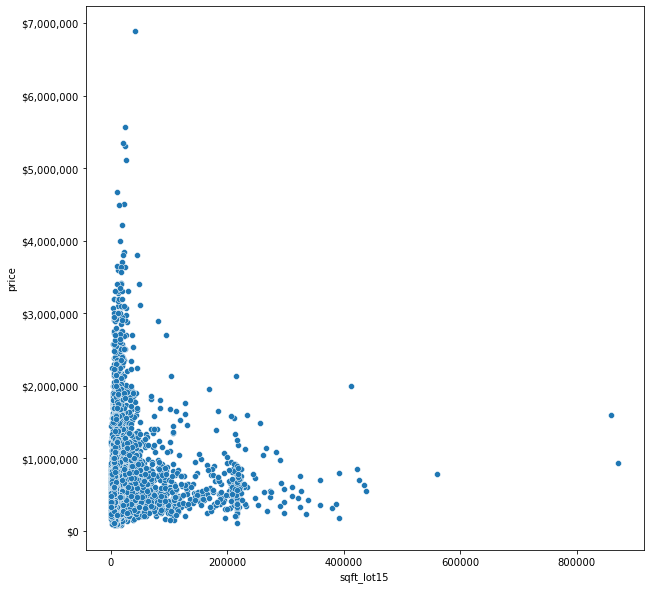

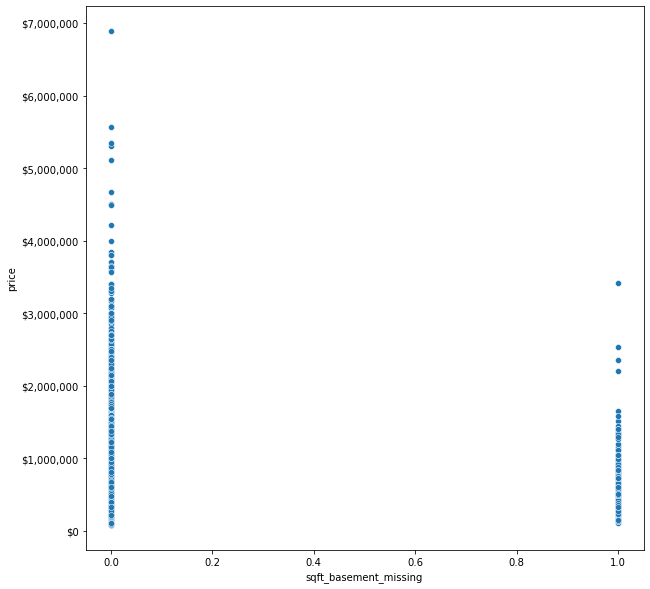

In [29]:
# Using scatter plots to check correlations
for i, col in enumerate(df_new.columns):
    plt.figure(i, figsize=(10,10))
    sns.scatterplot(x=col, y=df_new['price'], data=df_new)
    import matplotlib.ticker as mtick #importing ticker to customize tickers
    fmt = '${x:,.0f}' #setting the format to $
    tick = mtick.StrMethodFormatter(fmt) #appending it to a formatter
    plt.gca().yaxis.set_major_formatter(tick) #applying the format

# Modeling

## Baseline Model

In [30]:
#setting up base model with highest correlated column to price from heatmap
import statsmodels.api as sm
import statsmodels.formula.api as smf

x_basic = df_new['sqft_living']
y_basic = df_new['price']

model = sm.OLS(y_basic, sm.add_constant(x_basic)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 2.069e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:50:55   Log-Likelihood:            -2.9966e+05
No. Observations:               21589   AIC:                         5.993e+05
Df Residuals:                   21587   BIC:                         5.993e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.739e+04   4378.923     -8.539      0.000    -4.6e+04   -2.88e+04
sqft_living   277.5422      1.930    143.837      0.000     273.760     281.324
==============================================================================
Omnibus:                    13425.398   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331839.191
Skew:                           2.568   Prob(JB):                         0.00
Kurtosis:                      21.507   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

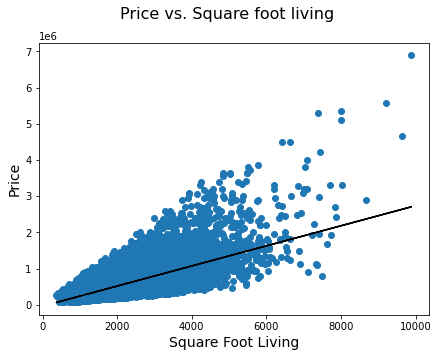

In [57]:
m, c = np.polyfit(x_basic, y_basic, 1)

fig = plt.figure(figsize=(7, 5))
fig.suptitle('Price vs. Square foot living', fontsize=16)
plt.scatter(x_basic, y_basic)
plt.plot(x_basic, m*x_basic+c, c='black')
plt.xlabel('Square Foot Living', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

## Homoscedasticity Check for Baseline Model 

In [32]:
model.predict(sm.add_constant(x_basic))

0        290108.943350
1        675892.620304
2        176316.635760
3        506591.869986
4        428880.050168
             ...      
21592    387248.718123
21593    603731.644759
21594    245702.189169
21595    406676.673077
21596    245702.189169
Length: 21589, dtype: float64

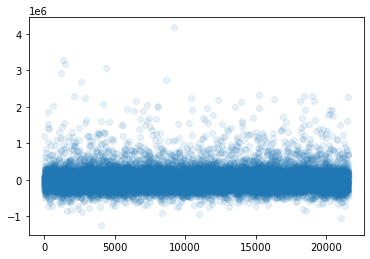

In [33]:
#Checking for homoscedasticity
residuals = model.resid

plt.scatter(x=range(residuals.shape[0]), y=residuals, alpha=0.1);

## Normality Check for Baseline Model

<ipython-input-34-d7327fda397e>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


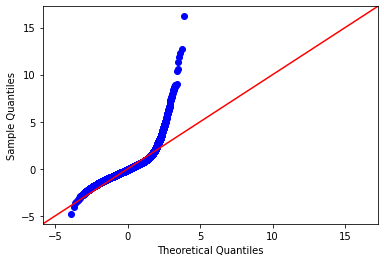

In [34]:
import scipy.stats as stats
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

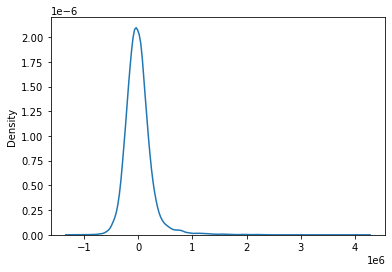

In [35]:
#Checking for linear regression assumptions for the baseline. Checking for normality.
sns.kdeplot(x=model.resid);

## Model 2

In [36]:
## Adding features to the model to see if it will improve scores. Adding features that are correlated with .5 and higher from
#heatmap

X = pd.DataFrame(data=df_new, columns=['sqft_living', 'grade', 'sqft_above', 'sqft_living15'])
y = df_new['price']
X.head()

,sqft_living,grade,sqft_above,sqft_living15
0,1180,4,1180,1340
1,2570,4,2170,1690
2,770,3,770,2720
3,1960,4,1050,1360
4,1680,5,1680,1800


In [37]:
model2 = sm.OLS(y, sm.add_constant(X)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6417.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:50:56   Log-Likelihood:            -2.9846e+05
No. Observations:               21589   AIC:                         5.969e+05
Df Residuals:                   21584   BIC:                         5.970e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.342e+05   7291.222    -45.835      0.000   -3.48e+05    -3.2e+05
sqft_living     218.5031      4.147     52.689      0.000     210.375     226.632
grade          1.086e+05   2381.907     45.584      0.000    1.04e+05    1.13e+05
sqft_above      -82.6951      4.389    -18.842      0.000     -91.298     -74.093
sqft_living15    31.0497      3.966      7.829      0.000      23.276      38.824
==============================================================================
Omnibus:                    15263.820   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           578114.258
Skew:                           2.946   Prob(JB):                         0.00
Kurtosis:                      27.657   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Homoscedasticity Check for Model 2

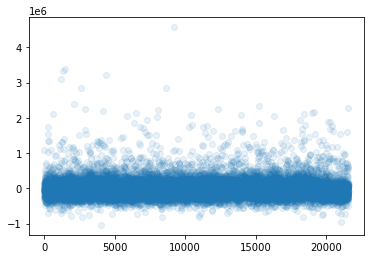

In [38]:
residuals_m2 = model2.resid

plt.scatter(x=range(residuals_m2.shape[0]), y=residuals_m2, alpha=0.1);

## Normality Check for Model 2

<ipython-input-39-6105dfd15eb7>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


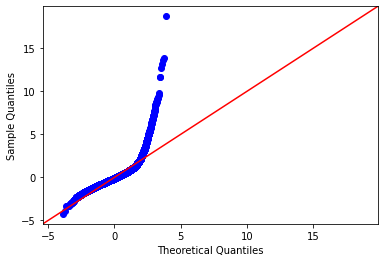

In [39]:
fig = sm.graphics.qqplot(residuals_m2, dist=stats.norm, line='45', fit=True)
fig.show()

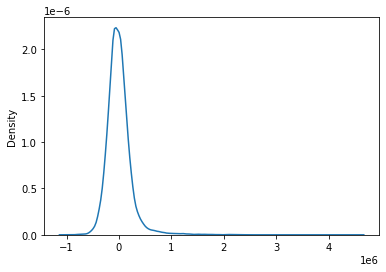

In [40]:
#Checking for linear regression assumptions for the baseline. Checking for normality.
sns.kdeplot(x=model2.resid);

## Multicollinearity Check for Model 2

In [41]:
#Checking for values that have strong multicollnearity
df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_1', 'level_0'], inplace=True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc > 0.75) & (df.cc < 1)] 

,cc
pairs,
"(sqft_living, sqft_above)",0.875386
"(sqft_living, grade)",0.764354
"(sqft_living, sqft_living15)",0.758302
"(grade, sqft_above)",0.756236


In [42]:
#Checking VIF scores to remove highly correlated variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_vif1 = add_constant(X)
pd.Series([variance_inflation_factor(X_vif1.values, i) 
               for i in range(X_vif1.shape[1])], index=X_vif1.columns)

const            19.249482
sqft_living       5.162920
grade             2.822569
sqft_above        4.734643
sqft_living15     2.670811
dtype: float64

## Checking target for transformation

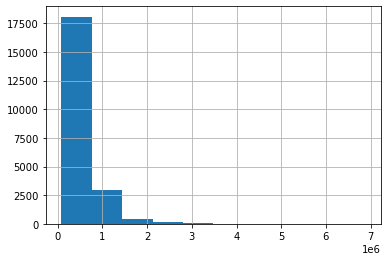

In [43]:
#Checking y hist to see if it needs transforming
y.hist();

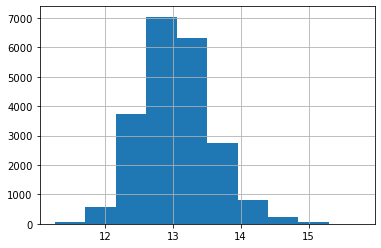

In [44]:
# Transforming y using log
y_log = np.log(y)
y_log.hist();

## Model 3

In [45]:
# Creating new model using new logged target and dropping highest multicollinear variable
X_3 = X.drop(columns = 'sqft_living')
model3 = sm.OLS(y_log, sm.add_constant(X_3)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     7917.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:50:57   Log-Likelihood:                -8744.7
No. Observations:               21589   AIC:                         1.750e+04
Df Residuals:                   21585   BIC:                         1.753e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5993      0.011   1080.475      0.000      11.578      11.620
grade             0.2254      0.003     65.354      0.000       0.219       0.232
sqft_above     4.086e-05   5.05e-06      8.095      0.000     3.1e-05    5.08e-05
sqft_living15     0.0002   5.67e-06     28.903      0.000       0.000       0.000
==============================================================================
Omnibus:                       78.737   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.659
Skew:                           0.134   Prob(JB):                     1.37e-17
Kurtosis:                       2.879   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Homoscedasticity Check for Model 3

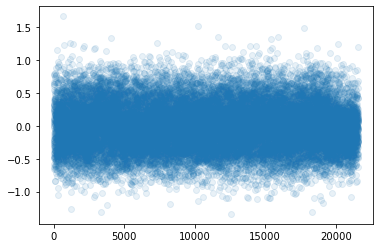

In [46]:
#Checking for homoscedasticity
residuals_m3 = model3.resid

plt.scatter(x=range(residuals_m3.shape[0]), y=residuals_m3, alpha=0.1);

## Normality Check for Model 3

<ipython-input-47-80110c023be7>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


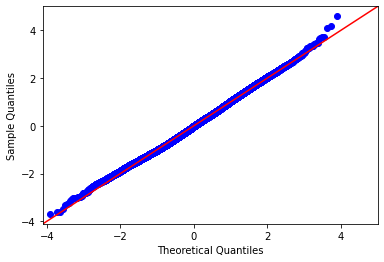

In [47]:
fig = sm.graphics.qqplot(residuals_m3, dist=stats.norm, line='45', fit=True)
fig.show()

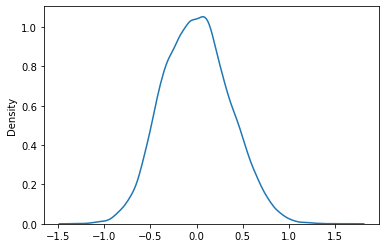

In [48]:
#Checking for linear regression assumptions for the baseline. Checking for normality.
sns.kdeplot(x=model3.resid);

## Multicollinearity Check for Model 3

In [49]:
#Checking for values that have strong multicollnearity
df = X_3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_1', 'level_0'], inplace=True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc > 0.75) & (df.cc < 1)] 

,cc
pairs,
"(grade, sqft_above)",0.756236


## Model 4

In [50]:
# Adding features from correlation map above .2

X_m4 = df_new.drop(columns = ['price','sqft_living', 'sqft_lot','condition', 'yr_built', 'yr_renovated', 'sqft_lot15', 
                              'sqft_basement_missing'])
X_m4.head()

,bedrooms,bathrooms,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15
0,3,1.00,1.0,0.0,0,4,1180,0.0,1340
1,3,2.25,2.0,0.0,0,4,2170,400.0,1690
2,2,1.00,1.0,0.0,0,3,770,0.0,2720
3,4,3.00,1.0,0.0,0,4,1050,910.0,1360
4,3,2.00,1.0,0.0,0,5,1680,0.0,1800


In [51]:
model4 = sm.OLS(y_log, sm.add_constant(X_m4)).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     3400.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:50:57   Log-Likelihood:                -7223.5
No. Observations:               21589   AIC:                         1.447e+04
Df Residuals:                   21579   BIC:                         1.455e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7059      0.014    859.499      0.000      11.679      11.733
bedrooms         -0.0113      0.003     -3.414      0.001      -0.018      -0.005
bathrooms        -0.0164      0.005     -3.209      0.001      -0.026      -0.006
floors            0.0548      0.006      9.517      0.000       0.044       0.066
waterfront        0.3582      0.031     11.728      0.000       0.298       0.418
view              0.0697      0.003     19.975      0.000       0.063       0.077
grade             0.1768      0.003     50.700      0.000       0.170       0.184
sqft_above        0.0001   6.05e-06     22.433      0.000       0.000       0.000
sqft_basement     0.0003   7.22e-06     38.870      0.000       0.000       0.000
sqft_living15  8.383e-05   5.62e-06     14.921      0.000    7.28e-05    9.48e-05
==============================================================================
Omnibus:                       14.443   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.826
Skew:                           0.042   Prob(JB):                     0.000995
Kurtosis:                       2.908   Cond. No.                     3.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Homoscedasticity Check for Model 4

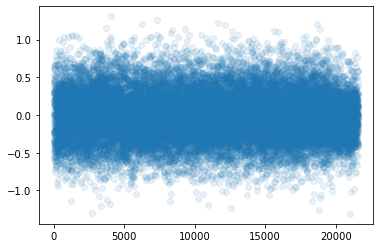

In [52]:
#Checking homoscedasticity
residuals_m4 = model4.resid

plt.scatter(x=range(residuals_m4.shape[0]), y=residuals_m4, alpha=0.1, );

## Normality Check for Model 4

<ipython-input-53-04e01d904544>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


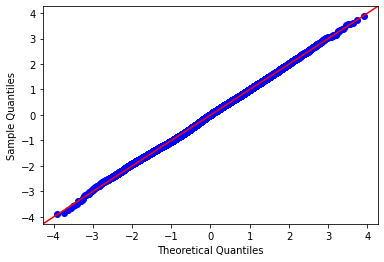

In [53]:
fig = sm.graphics.qqplot(residuals_m4, dist=stats.norm, line='45', fit=True)
fig.show()

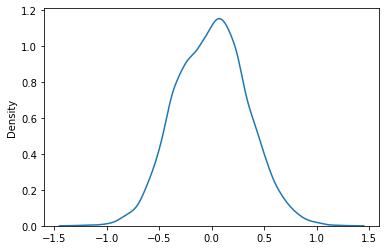

In [54]:
sns.kdeplot(x=model4.resid);

## Multicollinearity Check for Model 4

In [55]:
#Checking for values that have strong multicollnearity
df = X_m4.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_1', 'level_0'], inplace=True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc > 0.75) & (df.cc < 1)] 

,cc
pairs,
"(sqft_above, grade)",0.756236


In [56]:
X_vif2 = add_constant(X_m4)
pd.Series([variance_inflation_factor(X_vif2.values, i) 
               for i in range(X_vif2.shape[1])], index=X_vif2.columns)

const            35.010929
bedrooms          1.674202
bathrooms         2.905953
floors            1.820664
waterfront        1.174861
view              1.340636
grade             3.154466
sqft_above        4.684944
sqft_basement     1.870827
sqft_living15     2.793846
dtype: float64

# Conclusion

This analysis leads to this recommendation on what the real estate company should advise homeowners on when it comes to increasing the value of their home for sale.

- <b>Grade is one of the most important factors that can be controlled by the homeowner for price.</b>

A per grade increase of a home (housing construction including quality materials for exterior and interior) can increase the value of a home by 17.7%. 
Homeowners should modify their homes with higher quality materials for interiors and exteriors structures. 

<b>For the interior of homes:</b>

Plumbing, Flooring, Climate control, Electrical are components of a home that can improve grade.

<b>For the exterior of homes:</b>

Exterior walls and Roofing are components of a home that can improve grade. 

While quality materials are desirable for a home upgrade, craftsmanship plays an important role in grading. If a home has the highest quality materials but poorly constructed, grade could be negatively affected.

To highlight this, if we were to focus on adding bedrooms and bathrooms instead of upgrades that focus on grade, it could possibly have a negative effect on pricing with a roughly 0.1% and % 0.2% per bed or bath decrease in the value of the home.

Homes could have less bedrooms and bathrooms but yet still hold the same value as a home with more bedrooms or bathrooms.


# Next Steps

Further analyses could yield additional insights to growth:
- <b>Better grade evaluation.</b> This model could include whether exterior or interior builds have more of an impact on home value.
- <b>Renovation allocations vs Expected value.</b> Information on renovation costs vs value increase for those did renovations or kitchen upgrades could provide further insights.
- <b>Landscaping impact.</b> Homes are not only the house itself but the surround of the entire property. It adds to the exterior presence which could possibly influence demand and therefore could lead to an adjustment in price.